In [1]:
# load modules

import matplotlib.pyplot as plt
import argparse
import os,glob
from datetime import datetime

import numpy as np
import xarray as xr

In [2]:
#%% Define directories

# current dir
wdir = os.getcwd()
# data dir
ddir = os.path.join(os.path.dirname(wdir),'output/linear_model')

In [3]:
#%% Load data

profiles = xr.open_dataset(os.path.join(ddir,'rad_profiles.nc'))

In [4]:
profiles

<xarray.Dataset>
Dimensions:      (launch_time: 199, play: 99, plev: 100)
Coordinates:
  * plev         (plev) float64 1e+03 2e+03 3e+03 ... 9.8e+04 9.9e+04 1e+05
  * play         (play) float64 1.5e+03 2.5e+03 3.5e+03 ... 9.85e+04 9.95e+04
  * launch_time  (launch_time) datetime64[ns] 2020-02-01 ... 2020-02-01
Data variables:
    platform     (launch_time) object ...
    tlay         (launch_time, play) float64 ...
    h2o          (launch_time, play) float64 ...
    zlay         (launch_time, play) float64 ...
    zlev         (launch_time, plev) float64 ...
    sfc_emis     (launch_time) float64 ...
    sfc_alb      (launch_time) float64 ...
    sfc_t        (launch_time) float64 ...
    cos_sza      (launch_time) float64 ...
    lw_dn        (launch_time, plev) float64 ...
    lw_up        (launch_time, plev) float64 ...
    lw_net       (launch_time, plev) float64 ...
    sw_dn        (launch_time, plev) float64 ...
    sw_up        (launch_time, plev) float64 ...
    sw_net       (launch_time, plev) float64 ...
    co2          (launch_time, play) float64 ...
    ch4          (launch_time, play) float64 ...
    n2o          (launch_time, play) float64 ...
    o3           (launch_time, play) float64 ...
    o2           (launch_time, play) float64 ...
    n2           (launch_time, play) float64 ...
    co           (launch_time, play) float64 ...
    mr           (launch_time, play) float64 ...
    rho          (launch_time, play) float64 ...
    q_rad        (launch_time, play) float64 ...
    q_rad_lw     (launch_time, play) float64 ...
    q_rad_sw     (launch_time, play) float64 ...

In [25]:
# perturbations
dT = 1 # K
dq = 0.001 # kg/kg

# number of levels
Np = profiles.play.size
# range of perturbed T
s_dT = slice(1,1+Np)
# range of perturbed q
s_dq = slice(1+Np,1+2*Np)

# Jacobian matrix dQrad/dX for X = T and q:
J_T_qrad = (profiles.q_rad[s_dT] - np.repeat(profiles.q_rad[0].values[...,np.newaxis],Np,axis=-1))/dT
J_q_qrad = (profiles.q_rad[s_dq] - np.repeat(profiles.q_rad[0].values[...,np.newaxis],Np,axis=-1))/dq

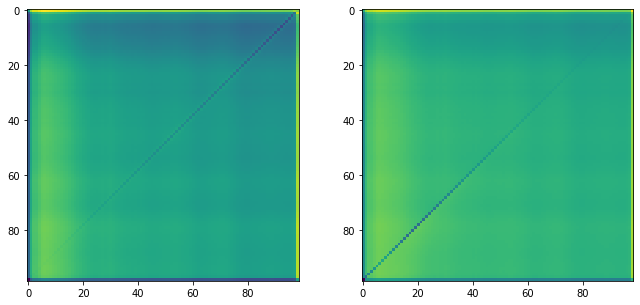

In [28]:
fig,ax = plt.subplots(ncols=2,figsize=(11,5))

ax[0].imshow(J_T_qrad)
ax[1].imshow(J_q_qrad)